In [1]:
import pandas as pd
from collections import defaultdict

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

pylab.rcParams['figure.figsize'] = (14, 8)

plt.subplots_adjust(top=0.9)

folder = './LO_AI_WEIGHT_0.8'

parent_base = 'LO_AI_WEIGHT_0.8'
child_base = 'HI_AI_WEIGHT_'
underlying = "WHICH_OTHER_4"
structure = 'standard'
num_reps = 10

base_template = "{tlf}/{cldb}{cldopt}/{und}/{struct}-{rep}-quorum.csv"

options = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']

loaded_replicants = []
loaded_children = []
loaded_parent = []
loaded_base = []

for child in options:
    for replicant in range(0,num_reps):
        try:
            loaded = pd.read_csv(base_template.format(tlf=folder,
                                                      cldb=child_base,
                                                      cldopt=child,
                                                      und=underlying,
                                                      struct=structure,
                                                      rep=replicant))
        except Exception as err:
            print("Apparently there isn't anything in there")
            print(base_template.format(tlf=folder,
                                      cldb=child_base,
                                      cldopt=child,
                                      und=underlying,
                                      struct=structure,
                                      rep=replicant))
            continue

        loaded['replicant'] = replicant
        loaded_children.append(loaded)
    squished_child = pd.concat(loaded_children)
    squished_child['HI AI Threshold'] = child
    loaded_parent.append(squished_child)
    loaded_children = []

squished_base = pd.concat(loaded_parent)
squished_base.head()
            

Populating the interactive namespace from numpy and matplotlib


,update,avg_age,max_age,avg_coop,avg_points,percenttruthful_defector,percentdonator,grid_usage,replicant,HI AI Threshold
0,0,0.00000,0,0.820000,0.00000,0.180000,0.820000,0.166667,0,0.1
1,10,10.00000,10,0.820000,10.00000,0.180000,0.820000,0.166667,0,0.1
2,20,20.00000,20,0.820000,20.00000,0.180000,0.820000,0.166667,0,0.1
3,30,7.15438,30,0.857143,8.81221,0.142857,0.857143,0.241111,0,0.1
4,40,15.09980,40,0.845987,13.89260,0.154013,0.845987,0.256111,0,0.1


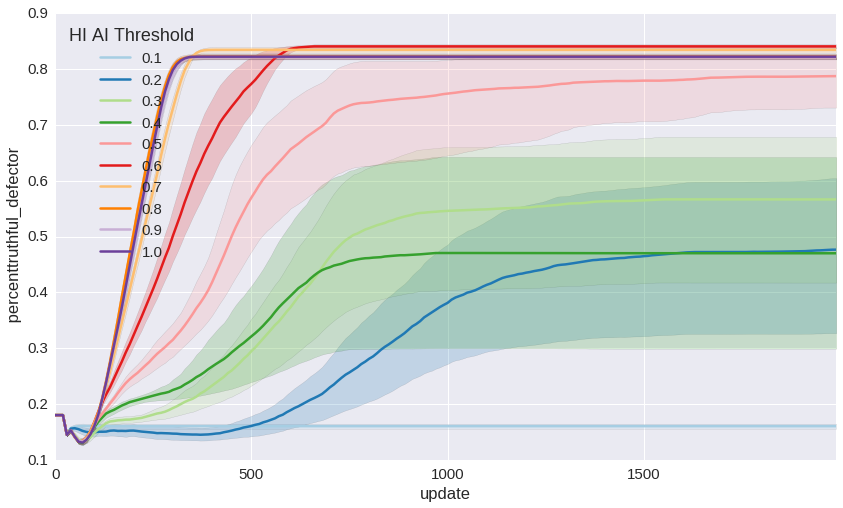

In [13]:
sns.tsplot( time="update", value=" percenttruthful_defector", unit="replicant", condition="HI AI Threshold", data=squished_base, ci=95, color=sns.color_palette("Paired", 10))

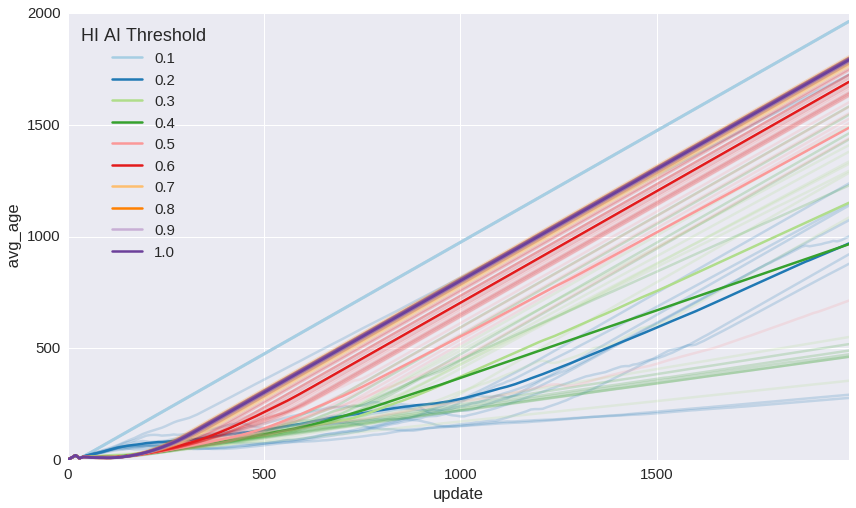

In [12]:
sns.tsplot( time="update", value=" avg_age", unit="replicant", err_style="unit_traces", condition="HI AI Threshold", data=squished_base, color=sns.color_palette("Paired", 10))